In [1]:
#importando os dados para o google colab
from google.colab import files
uploaded = files.upload()

Saving iris.data to iris.data


In [2]:
import numpy as np #biblioteca utilizada para trabalhar com vetores
import pandas as pd #biblioteca para trabalhar com dataframes (planilhas excel)
import seaborn as sns #biblioteca utilizada para criar gráficos mais "bonitos"
import matplotlib.pyplot as plt #biblioteca para criar gráficos "comuns" ao estilo Matlab
import google

In [3]:
#carregando os dados para o pandas
base=pd.read_csv('iris.data')

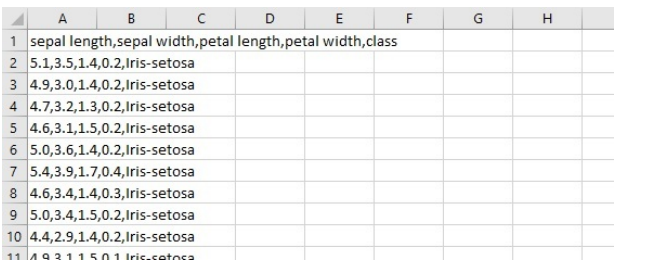

In [6]:
base.head(10)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


Criando nossas variáveis que armazenarão os dados separados como características das amostras(entradas), assim como o tipo de planta (saídas). Para isso criamos nossa variável entradas que por meio da função ***.iloc[ ]*** e do comando ***.values*** pega todos valores contidos em todas as linhas e das 4
primeiras colunas de base (desconsiderando a coluna de índice).
O mesmo é feito com nossa variável saidas, por meio da
mesma função pega como atributo todos os valores de todas as linhas, mas somente da 4ª coluna (lembrando que as colunas com informação começam em 0, a 4ª coluna é a que contém os dados de saída).


In [7]:
entradas = base.iloc[:, 0:4].values
saidas = base.iloc[:, 4].values

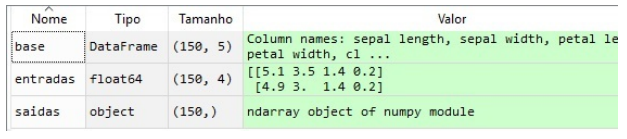

Dessa forma separamos os dados de entrada e de saída de nossa base de dados, permitindo o cruzamento desses dados ou a aplicação de funções sobre os mesmos.

Quando estamos fazendo nossos ajustes iniciais, na chamada fase de polimento dos dados, um dos processos mais comuns a se fazer é a conversão de nossos dados de base, todos para o mesmo tipo. Raciocine que é impossível fazer, por exemplo, uma multiplicação entre texto e número.

Até o momento os dados que separamos estão em duas formas diferentes, os atributos de largura e comprimento das pétalas e sépalas em nossos dados de entrada são numéricos enquanto os dados de saída, referente a nomenclatura dos tipos de plantas classificadas, estão em formato de texto.

In [8]:
#mostrando as "características" das colunas
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Sendo assim, usaremos uma ferramenta capaz de converter texto em número para que possamos finalmente aplicar funções sobre os mesmos. A ferramenta em questão é a LabelEncoder, do módulo preprocessing da biblioteca sklearn. O processo de
importação é feito como de praxe. Em seguida criamos uma variável labelencoder que inicializa essa ferramenta.

In [11]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
saidas = labelencoder.fit_transform(saidas)
print(saidas)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


Na sequência, outro processo que teremos de fazer, uma
vez que processaremos nossos dados em uma rede neural densa, é a criação de variáveis do tipo Dummy. Variáveis Dummy são variáveis que criam uma indexação para nossa saída.
Lembre-se que aqui estamos classificando 150 amostras em 3 tipos diferentes, porém os neurônios da camada de saída retornarão valores 0 ou 1. Dessa forma, precisamos criar um padrão de indexação que faça sentido tanto para o usuário quanto para o interpretador.
Em outras palavras, teremos de criar um padrão numérico binário para 3 saídas diferentes de acordo, nesse caso, com o tipo de planta. Por exemplo

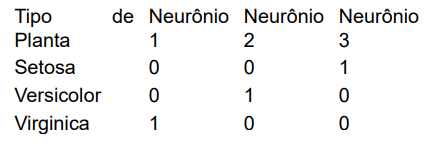

In [12]:
from keras.utils import np_utils

saidas_dummy = np_utils.to_categorical(saidas)
print(saidas_dummy)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

A nível de código, fazemos a importação da ferramenta
np_utils, parte do módulo utils da biblioteca keras. Em seguida criamos uma variável de nome saidas_dummy que recebe sobre si como atributo a função np_utils.to_categorical( ) para que sejam criados os respectivos números de indexação como na tabela
exemplo acima, para cada uma das amostras da base de dados.


Aqui vamos dividir nossa base de dados em partes e
realizar testes com essas partes para avaliação da performance do modelo. Também é possível aplicar o processamento da rede diretamente sobre nossa base de dados, porém uma prática sempre recomendável para se certificar da integridade dos dados é os processar em partes distintas e realizar a comparação.
Dessa forma, criamos quatro variáveis dedicadas a partes para treino e teste de nossa rede neural. Logo etreino, eteste, streino, steste recebem como atributo train_test_split, que por sua vez recebe como parâmetro os dados contidos em entradas,
saidas_dummy e por fim é definido que 25% das amostras sejam separadas para teste, enquanto os outros 75% serão separadas para treino.


In [15]:
from sklearn.model_selection import train_test_split

etreino, eteste, streino, steste = train_test_split(entradas, saidas_dummy, test_size = 0.25)

In [14]:
print(etreino)

[[5.5 2.3 4.  1.3]
 [5.1 3.7 1.5 0.4]
 [5.5 2.6 4.4 1.2]
 [4.9 3.  1.4 0.2]
 [5.2 2.7 3.9 1.4]
 [4.8 3.4 1.6 0.2]
 [6.  2.7 5.1 1.6]
 [7.9 3.8 6.4 2. ]
 [6.3 2.8 5.1 1.5]
 [6.  3.  4.8 1.8]
 [6.7 3.3 5.7 2.1]
 [6.4 2.7 5.3 1.9]
 [4.6 3.1 1.5 0.2]
 [5.7 2.9 4.2 1.3]
 [6.3 2.5 4.9 1.5]
 [5.1 3.8 1.9 0.4]
 [6.9 3.1 5.4 2.1]
 [5.1 2.5 3.  1.1]
 [5.1 3.4 1.5 0.2]
 [5.1 3.3 1.7 0.5]
 [5.5 2.4 3.8 1.1]
 [6.1 3.  4.9 1.8]
 [4.4 3.  1.3 0.2]
 [4.9 2.4 3.3 1. ]
 [4.8 3.4 1.9 0.2]
 [6.7 2.5 5.8 1.8]
 [5.6 2.9 3.6 1.3]
 [4.9 2.5 4.5 1.7]
 [6.3 3.3 4.7 1.6]
 [5.6 3.  4.1 1.3]
 [6.2 2.9 4.3 1.3]
 [5.7 2.6 3.5 1. ]
 [5.7 4.4 1.5 0.4]
 [6.  2.2 5.  1.5]
 [4.4 3.2 1.3 0.2]
 [6.7 3.1 4.7 1.5]
 [6.7 3.1 5.6 2.4]
 [7.1 3.  5.9 2.1]
 [7.7 3.8 6.7 2.2]
 [6.2 3.4 5.4 2.3]
 [5.8 2.6 4.  1.2]
 [5.4 3.9 1.7 0.4]
 [5.6 2.8 4.9 2. ]
 [6.9 3.1 4.9 1.5]
 [5.  3.4 1.6 0.4]
 [6.1 2.8 4.7 1.2]
 [7.2 3.  5.8 1.6]
 [4.8 3.  1.4 0.3]
 [6.6 3.  4.4 1.4]
 [4.7 3.2 1.3 0.2]
 [5.7 3.  4.2 1.2]
 [5.5 2.5 4.  1.3]
 [5.  3.  1.

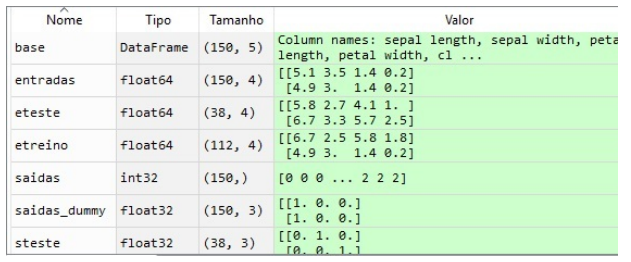

Vamos dar início a criação da estrutura de nossa
rede neural densa, como sempre, inicialmente é necessário fazer as devidas importações para que possamos usufruir das ferramentas adequadas.
Então do módulo models da biblioteca keras importamos
Sequential, da mesma forma, do módulo layers importamos Dense. Sequential é um modelo pré-configurado onde conseguimos criar e fazer as devidas conexões entre camadas de neurônios, Dense por
sua vez permite a conexão entre todos nós da rede assim como a aplicação de funções em todas etapas da mesma.

In [16]:
from keras.models import Sequential
from keras.layers import Dense

classificador = Sequential()

classificador.add(Dense(50, activation='relu', input_dim = 4))
classificador.add(Dense(50, activation='relu'))
classificador.add(Dense(3, activation='softmax'))
classificador.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 2,953
Trainable params: 2,953
Non-trainable params: 0
_________________________________________________________________


Prosseguindo, por meio da função ***.compile( )*** criamos o compilador para nossa rede neural, nesta etapa é necessário passar três parâmetros, o primeiro deles, ***optimizer = ‘adam’***, com o nome autoexplicativo, aplica alguns métodos para otimização dos resultados dos processamentos, ***loss = ‘categorical_crossentropy’*** é a nossa função de perda, raciocine que em uma rede neural há uma
pequena parcela das amostras que podem ter dados inconsistentes ou erros de processamento, estas caem nessa categoria, o parâmetro da função de perda por sua vez tentará pegar essas amostras fora da curva e tentar encaixar de acordo com a semelhança/proximidade, a outras amostras que foram processadas
corretamente, por fim ***metrics = [‘accuracy’]*** faz a avaliação interna do modelo, mensurando sua precisão quanto ao processo de categorizar corretamente as amostras.


In [17]:
classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Por fim, por meio da função ***.fit( )*** faremos a alimentação de nossa rede e definiremos os parâmetros de processamento dela. Sendo assim, ***.fit( )*** recebe como parâmetros os dados de ***etreino*** e
de ***streino***, ***batch_size = 10*** diz respeito a taxa de atualização dos pesos, ou seja, de quantas em quantas amostras serão testadas, corrigidas e testadas e por fim ***epochs = 1000*** define quantas vezes a rede neural será executada.
Esses parâmetros na prática devem inclusive serem modificados e testados para tentar sempre encontrar a melhor performance do algoritmo. Em certos casos a taxa de atualização pode influenciar bastante a diminuição da margem de erro, assim como executar a rede neural mais vezes faz o que em algumas literaturas é chamado de aprendizagem por reforço, toda rede neural começa com rápidas atualizações e correções, porém ela chega em níveis onde após a execução de algumas milhares (ou até mesmo milhões) de vezes executada ela pode acabar estagnada em um
valor.

In [21]:
classificador.fit(etreino, streino, batch_size=10, epochs=100, validation_split=0.2)

Epoch 1/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0571 - accuracy: 0.9773 - val_loss: 0.1337 - val_accuracy: 0.9565
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.0618 - accuracy: 0.9773 - val_loss: 0.1390 - val_accuracy: 0.9565
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0618 - accuracy: 0.9773 - val_loss: 0.1515 - val_accuracy: 0.9565
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0582 - accuracy: 0.9659 - val_loss: 0.1208 - val_accuracy: 0.9565
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0619 - accuracy: 0.9773 - val_loss: 0.1589 - val_accuracy: 0.9565
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0633 - accuracy: 0.9773 - val_loss: 0.1422 - val_accuracy: 0.9565
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0580 - accuracy: 0.9773 - val_loss: 0.1476 - val_accuracy: 0.9565
Epoch 8/100
9/9 [==========

Terminada a fase de processamento da rede neural, hora de fazer algumas avaliações de sua performance para conferir e confirmar a integridade dos resultados.



In [22]:
score = classificador.evaluate(eteste, steste, verbose=1)
print('Test score', score[0])
print('Test accuracy', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.0735 - accuracy: 0.9737
Test score 0.07346905022859573
Test accuracy 0.9736841917037964


Outra metodologia de avaliação de nosso modelo é feita pela chamada Matriz de 
Confusão, método que nos mostrará quantas classificações foram feitas corretamente e as que foram classificadas erradas para cada saída. Para aplicar a matriz de confusão em
nosso modelo precisaremos fazer algumas alterações em nossos dados, assim como fizemos lá no início na fase de polimento.
Dessa vez importamos a biblioteca ***Numpy*** e a referenciamos como ***np***. Em seguida criamos uma variável de nome ***steste2*** que recebe como atributo a função ***np.argmax(t)***, que pega os valores de ***steste*** e gera uma indexação própria, contendo a posição da matriz onde a planta foi classificada. O mesmo é feito em previsoes e atribuído para **previsoes2**.


In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix

previsoes = classificador.predict(eteste)
#previsoes = (previsoes > 0.5)

steste2 = [np.argmax(t) for t in steste]
previsoes2 = [np.argmax(t) for t in previsoes]
matrizConfusao = confusion_matrix(previsoes2, steste2)
print(matrizConfusao)

[[13  0  0]
 [ 0 12  0]
 [ 0  1 12]]


In [ ]:
print(steste2)

[1, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 0]
